# Projet OLIST : Segmentez les clients d'un site e-commerce
## Notebook d'analyse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Chargement des données

In [2]:
data_customers= pd.read_csv('olist_customers_dataset.csv')

In [3]:
data_geolocalisation = pd.read_csv('olist_geolocation_dataset.csv')

In [4]:
data_order_items=pd.read_csv('olist_order_items_dataset.csv')

In [5]:
data_order_payments=pd.read_csv('olist_order_payments_dataset.csv')

In [6]:
data_order_reviews=pd.read_csv('olist_order_reviews_dataset.csv')

In [7]:
data_orders=pd.read_csv('olist_orders_dataset.csv')

In [8]:
data_products=pd.read_csv('olist_products_dataset.csv')

In [9]:
data_sellers=pd.read_csv('olist_sellers_dataset.csv')

In [10]:
data_product_category=pd.read_csv('product_category_name_translation.csv')

# 2. Structure des données

### Création d'une fonction pour analyser la structure des dataframes

In [11]:
def data_structure(data):
    ''' Affiche la structure du dataframe'''
    
    # comptage des colonnes numériques et catégorielles
    numeric_columns = len(data.select_dtypes(include = ['int64','float64']).columns)
    categorical_columns= len(data.select_dtypes(include=['object','category']).columns)

    # création d'un dictionnaire avec les items de structure de nos données
    dict_structure = {'Nombre de lignes':data.shape[0], 'Nombre de colonnes':int(data.shape[1]), 
                      'Nombre de variables catégorielles':categorical_columns,
                      'Nombre de variables numériques ':numeric_columns,
                      'Pourcentage de données manquantes':int((data.isnull().sum()/len(data)*100).mean()),
                      'Nombre de doublons':int(len(data[data.duplicated()]))}

    # transformation des éléments du dictionnaire en dataframe
    dataframe =pd.DataFrame(list(dict_structure.items()),columns=['Caractéristiques','Valeurs'])
    return dataframe

### 1) Structure data_customers

In [12]:
data_structure(data_customers)

,Caractéristiques,Valeurs
0,Nombre de lignes,99441
1,Nombre de colonnes,5
2,Nombre de variables catégorielles,4
3,Nombre de variables numériques,1
4,Pourcentage de données manquantes,0
5,Nombre de doublons,0


In [13]:
data_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [14]:
data_customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,9e44cac7574c95db25b2982fb26afd43,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [15]:
data_customers.customer_state.unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

### 2) Structure data_geolocalisation

In [16]:
data_structure(data_geolocalisation)

,Caractéristiques,Valeurs
0,Nombre de lignes,1000163
1,Nombre de colonnes,5
2,Nombre de variables catégorielles,2
3,Nombre de variables numériques,3
4,Pourcentage de données manquantes,0
5,Nombre de doublons,261831


In [17]:
data_geolocalisation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [18]:
data_geolocalisation.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [19]:
data_geolocalisation.geolocation_zip_code_prefix.nunique()

19015

In [20]:
print(f'Nombre de villes différentes :{data_geolocalisation.geolocation_city.nunique()}')

Nombre de villes différentes :8011


In [21]:
print(f'Nombre d\'état (state) différents :{data_geolocalisation.geolocation_state.nunique()}')

Nombre d'état (state) différents :27


In [22]:
data_geolocalisation[data_geolocalisation.duplicated()].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


### 3) Structure data_order_items

In [23]:
data_structure(data_order_items)

,Caractéristiques,Valeurs
0,Nombre de lignes,112650
1,Nombre de colonnes,7
2,Nombre de variables catégorielles,4
3,Nombre de variables numériques,3
4,Pourcentage de données manquantes,0
5,Nombre de doublons,0


In [24]:
data_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
data_order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [26]:
data_order_items.order_item_id.nunique()

21

In [27]:
data_order_items.order_item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

### 4) Structure data_order_payments

In [28]:
data_structure(data_order_payments)

,Caractéristiques,Valeurs
0,Nombre de lignes,103886
1,Nombre de colonnes,5
2,Nombre de variables catégorielles,2
3,Nombre de variables numériques,3
4,Pourcentage de données manquantes,0
5,Nombre de doublons,0


In [29]:
data_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [30]:
data_order_payments.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [31]:
data_order_payments.payment_sequential.nunique()

29

In [32]:
data_order_payments.payment_sequential.unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20], dtype=int64)

In [33]:
data_order_payments.payment_type.nunique()

5

In [34]:
data_order_payments.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [35]:
data_order_payments.payment_installments.nunique()

24

In [36]:
data_order_payments.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

### 5) Structure data_order_reviews

In [37]:
data_structure(data_order_reviews)

,Caractéristiques,Valeurs
0,Nombre de lignes,100000
1,Nombre de colonnes,7
2,Nombre de variables catégorielles,6
3,Nombre de variables numériques,1
4,Pourcentage de données manquantes,20
5,Nombre de doublons,0


In [38]:
data_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [39]:
data_order_reviews.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,100000,100000,100000.000000,11715,41753,100000,100000
unique,99173,99441,NaN,4600,36921,637,99010
top,e44840754f12fad2b8646712121b349a,8e17072ec97ce29f0e1f111e598b0c85,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,426,230,466,4
mean,NaN,NaN,4.070890,NaN,NaN,NaN,NaN
std,NaN,NaN,1.359663,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [40]:
data_order_reviews.review_score.unique()

array([4, 5, 1, 3, 2], dtype=int64)

In [41]:
data_order_reviews.review_comment_title.unique()

array([nan, 'recomendo', 'Super recomendo', ...,
       'Não foi entregue o pedido', 'OTIMA EMBALAGEM', 'Foto enganosa '],
      dtype=object)

In [42]:
# Périodes auquelles les commentaires ont été créés
print(f'Date de début de création des commentaires : {data_order_reviews.review_creation_date.min()}\nDate de fin de création des commentaires :{data_order_reviews.review_creation_date.max()}')

Date de début de création des commentaires : 2016-10-02 00:00:00
Date de fin de création des commentaires :2018-08-31 00:00:00


In [43]:
data_order_reviews.review_answer_timestamp.min(), data_order_reviews.review_answer_timestamp.max()

('2016-10-07 18:32:28', '2018-10-29 12:27:35')

### 6) Structure data_orders

In [44]:
data_structure(data_orders)

,Caractéristiques,Valeurs
0,Nombre de lignes,99441
1,Nombre de colonnes,8
2,Nombre de variables catégorielles,8
3,Nombre de variables numériques,0
4,Pourcentage de données manquantes,0
5,Nombre de doublons,0


In [45]:
data_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [46]:
data_orders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,146f79f564602aa6bf9ecbd760651c7f,ddd97c5c66119bd2fe33f8709f77ab7b,delivered,2018-07-28 13:11:22,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [47]:
data_orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [48]:
data_orders.order_status.nunique()

8

### 7) Structure data_products

In [49]:
data_structure(data_products)

,Caractéristiques,Valeurs
0,Nombre de lignes,32951
1,Nombre de colonnes,9
2,Nombre de variables catégorielles,2
3,Nombre de variables numériques,7
4,Pourcentage de données manquantes,0
5,Nombre de doublons,0


In [50]:
data_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [51]:
data_products.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e189be46c3e52f23ebe8a520e59d2c46,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### 8) structure data_sellers

In [52]:
data_structure(data_sellers)

,Caractéristiques,Valeurs
0,Nombre de lignes,3095
1,Nombre de colonnes,4
2,Nombre de variables catégorielles,3
3,Nombre de variables numériques,1
4,Pourcentage de données manquantes,0
5,Nombre de doublons,0


In [53]:
data_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [54]:
data_sellers.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,e4ebd3f87bf70440014f07ddda7fbe03,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### 9) Structure data_product_category

In [55]:
data_structure(data_product_category)

,Caractéristiques,Valeurs
0,Nombre de lignes,71
1,Nombre de colonnes,2
2,Nombre de variables catégorielles,2
3,Nombre de variables numériques,0
4,Pourcentage de données manquantes,0
5,Nombre de doublons,0


In [56]:
data_product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [57]:
data_product_category.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,informatica_acessorios,furniture_bedroom
freq,1,1


# 3. Nettoyage des données 

## 3.1. Suppression des doublons

In [58]:
Nbre_lignes_initiales_geolocalisation = data_geolocalisation.copy().shape[0]
Nbre_lignes_initiales_geolocalisation

1000163

In [59]:
data_geolocalisation.drop_duplicates(inplace=True)

In [60]:
print(f'Nombre de doublons après nettoyage :{len(data_geolocalisation[data_geolocalisation.duplicated()])}')

Nombre de doublons après nettoyage :0


In [61]:
Nbre_lignes_finales_geolocalisation = data_geolocalisation.shape[0]
Nbre_lignes_finales_geolocalisation

738332

In [62]:
print(f'Pourcentage de lignes supprimées : {((Nbre_lignes_initiales_geolocalisation-Nbre_lignes_finales_geolocalisation)/Nbre_lignes_initiales_geolocalisation)*100} %')

Pourcentage de lignes supprimées : 26.17883285024541 %


## 3.2. Jointure des Dataframes

In [63]:
# Jointure de data_customers et data_orders sur la clé customer_id
data = pd.merge(data_customers,data_orders, on='customer_id', how='inner')

# jointure de data et data_order_reviews sur la clé "order_id"
data = pd.merge(data, data_order_reviews, on='order_id', how='inner')

# jointure de data et de data_order_payments sur la clé order_id
data = pd.merge(data, data_order_payments, on='order_id', how='inner')

# jointure de data et de data_order_items sur la clé order_id
data = pd.merge(data, data_order_items, on='order_id', how='inner')

# jointure de data et data_products sur la clé product_id
data = pd.merge(data, data_products, on='product_id', how='inner')

#jointure de data et de data_sellers sur la clé seller_id
data = pd.merge(data, data_sellers, on='seller_id', how='inner')

# jointure de data et data_product_category sur la clé product_category_name
data = pd.merge(data, data_product_category, on='product_category_name', how='inner')

# Nous n'allons pas utiliser les données de géolocalisation. 
# Nous allons préférer utiliser les noms de villes à la place pour cette étude.

In [64]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,1141.0,1.0,8683.0,54.0,64.0,31.0,8577,itaquaquecetuba,SP,office_furniture


In [65]:
data_structure(data)

,Caractéristiques,Valeurs
0,Nombre de lignes,116581
1,Nombre de colonnes,40
2,Nombre de variables catégorielles,24
3,Nombre de variables numériques,16
4,Pourcentage de données manquantes,3
5,Nombre de doublons,0


## 3.3. Regroupement des catégories

### 3.3.1. Regroupement des catégories de produits

In [66]:
list_product_category = data_product_category.product_category_name_english.to_list()

In [67]:
len(list_product_category)

71

In [68]:
list_product_category

['health_beauty',
 'computers_accessories',
 'auto',
 'bed_bath_table',
 'furniture_decor',
 'sports_leisure',
 'perfumery',
 'housewares',
 'telephony',
 'watches_gifts',
 'food_drink',
 'baby',
 'stationery',
 'tablets_printing_image',
 'toys',
 'fixed_telephony',
 'garden_tools',
 'fashion_bags_accessories',
 'small_appliances',
 'consoles_games',
 'audio',
 'fashion_shoes',
 'cool_stuff',
 'luggage_accessories',
 'air_conditioning',
 'construction_tools_construction',
 'kitchen_dining_laundry_garden_furniture',
 'costruction_tools_garden',
 'fashion_male_clothing',
 'pet_shop',
 'office_furniture',
 'market_place',
 'electronics',
 'home_appliances',
 'party_supplies',
 'home_confort',
 'costruction_tools_tools',
 'agro_industry_and_commerce',
 'furniture_mattress_and_upholstery',
 'books_technical',
 'home_construction',
 'musical_instruments',
 'furniture_living_room',
 'construction_tools_lights',
 'industry_commerce_and_business',
 'food',
 'art',
 'furniture_bedroom',
 'books_

In [69]:
dict_product_categories = {
 
# health & beauty
 'health_beauty':"health_beauty",
 'perfumery':"health_beauty",

# computers & electronics
 'computers_accessories':"computers_electronics",
 'telephony':"computers_electronics",
 'watches_gifts':"computers_electronics",
 'tablets_printing_image':"computers_electronics",
 'fixed_telephony':"computers_electronics",
 'consoles_games':"computers_electronics",
 'audio':"computers_electronics",
 'electronics':"computers_electronics",
 'small_appliances':"computers_electronics",
 'computers':"computers_electronics",
    
# auto   
 'auto':"auto",
 
# home   
 'bed_bath_table':"home",
 'furniture_decor':"home",
 'housewares':"home",
 'air_conditioning':"home",
 'furniture_mattress_and_upholstery':"home",
 'furniture_living_room':"home",
 'kitchen_dining_laundry_garden_furniture':"home",
 'home_appliances':"home",
 'home_confort':"home",
 'furniture_bedroom':"home", 
 'la_cuisine':"home",
 'home_appliances_2':"home", 
 'home_comfort_2':"home",
 'small_appliances_home_oven_and_coffee':"home",

      
# food & drink
 'food_drink':"food_drink",
 'drinks':"food_drink",
 'food':"food_drink",
 
# Children   
 'baby':"children",
 'toys':"children",  
 'fashion_childrens_clothes':"children",
 'diapers_and_hygiene':"children",
    
    

# pet & garden
 'garden_tools':"pet_garden",
 'costruction_tools_garden':"pet_garden",
 'flowers':"pet_garden",
 'pet_shop':"pet_garden",
 
# fashion
 'fashion_shoes':"fashion",
 'luggage_accessories':"fashion",
 'fashion_bags_accessories':"fashion", 
 'fashion_male_clothing':"fashion",
 'fashion_underwear_beach':"fashion",
 'fashion_sport':"fashion",
 'fashio_female_clothing':"fashion",
 
# construction    
 'construction_tools_construction':"construction",
 'costruction_tools_tools':"construction",
 'home_construction':"construction",
 'construction_tools_lights':"construction",
 'construction_tools_safety':"construction",


# party
 'party_supplies':"party",
 'christmas_supplies':"party",

# office
 'stationery':"office",
 'office_furniture':"office",
 'agro_industry_and_commerce':"office",
 'industry_commerce_and_business':"office",
 'signaling_and_security':"office",
 'security_and_services':"office",


# culture & entertainment
  'art':"culture_entertainment",
 'books_technical':"culture_entertainment",
 'books_general_interest':"culture_entertainment",
 'books_imported':"culture_entertainment",
 'cine_photo':"culture_entertainment",
 'music':"culture_entertainment", 
 'cds_dvds_musicals':"culture_entertainment",
 'dvds_blu_ray':"culture_entertainment",
 'musical_instruments':"culture_entertainment", 
 'sports_leisure':"culture_entertainment",
 'arts_and_craftmanship':"culture_entertainment",
 
# other   
 'cool_stuff':"other",
 'market_place':"other",
}

In [70]:
data['product_category_name_english'] = data['product_category_name_english'].replace(dict_product_categories)

### 3.3.2. Regroupement des états en régions

In [71]:
# Les régions du Brésil sont une division territoriale officielle du Brésil
# Source : https://fr.wikipedia.org/wiki/R%C3%A9gions_du_Br%C3%A9sil#:~:text=R%C3%A9gions%20du%20Br%C3%A9sil%201%20R%C3%A9gion%20Centre-Ouest%202%20R%C3%A9gion,R%C3%A9gion%20Nord%204%20R%C3%A9gion%20Sud-Est%205%20R%C3%A9gion%20Sud

# Nous allons regrouper les états en régions selon le découpage officiel proposé par Institut Brésilien de Géographie et de Statistiques

dict_regions = {
    
    "DF": "centre_ouest",
    "GO": "centre_ouest",
    "MS": "centre_ouest",
    "MT": "centre_ouest",
    
    "AL": "nord_est",
    "BA": "nord_est",
    "CE": "nord_est",
    "MA": "nord_est",
    "PE": "nord_est",
    "PB": "nord_est",
    "PI": "nord_est",
    "RN": "nord_est",
    "SE": "nord_est",
    
    
    "AC": "nord", 
    "AM": "nord",
    "AP": "nord",
    "PA": "nord",
    "RO": "nord",
    "RR": "nord",
    "TO": "nord",
    
    "ES": "sud_est",
    "MG": "sud_est",
    "RJ": "sud_est",
    "SP": "sud_est",
    
    "PR": "sud",
    "RS": "sud",
    "SC": "sud",
    
}

# Remplacement des noms d'états par leur région respective
data['customer_state'] = data['customer_state'].replace(dict_regions)
data['seller_state'] = data['seller_state'].replace(dict_regions)

# Modification des noms de colonnes
data.rename(columns={'customer_state':'region'},inplace=True)
data.rename(columns={'seller_state':'seller_region'},inplace=True)

## 3.5. Suppression des colonnes inutiles

In [72]:
# regroupement des noms de colonnes à supprimer dans une liste
columns_to_drop =['customer_unique_id','review_comment_title','review_creation_date','review_answer_timestamp',
                  'review_comment_message','product_category_name','product_name_lenght','product_description_lenght',
                  'product_weight_g','product_width_cm','product_length_cm','product_height_cm','seller_zip_code_prefix'
                 ]
# Suppression des colonnes appartenant à liste
data= data.drop(columns_to_drop, axis=1)

## 3.4 Correction nom des colonnes

In [73]:
# création d'un dictionnaire avec la modification des noms de colonnes
columns = {
'customer_zip_code_prefix':'zip_code_prefix',
'customer_city':'city',
'customer_state':'state',
'product_category_name_english':'product_category_name'}

# modification des noms de colonnes
data = data.rename(columns=columns)

## 3.5. Suppression des données manquantes

In [74]:
data.isna().sum()

customer_id                         0
zip_code_prefix                     0
city                                0
region                              0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1213
order_delivered_customer_date    2515
order_estimated_delivery_date       0
review_id                           0
review_score                        0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_photos_qty                  0
seller_city                         0
seller_region                       0
product_cate

In [75]:
Nbre_lignes_initiales=len(data)

In [76]:
data=data.dropna()

In [77]:
Nbre_lignes_finales=len(data)

In [78]:
print(f'Pourcentage de lignes supprimées:{((Nbre_lignes_initiales-Nbre_lignes_finales)/Nbre_lignes_initiales)*100}, %')

Pourcentage de lignes supprimées:2.170164949691631, %


In [79]:
# Vérification du nombre de colonnes avec données manquantes après nettoyage
data.isna().sum()

customer_id                      0
zip_code_prefix                  0
city                             0
region                           0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_photos_qty               0
seller_city                      0
seller_region                    0
product_category_name            0
dtype: int64

## 4. Feature Engineering 

#### 4.1. Nombre de commandes par client

In [80]:
nb_order = pd.DataFrame(data.groupby(["customer_id"])["order_id"].nunique())

nb_order.rename(columns={"order_id": "nb_order"}, inplace=True)

data = pd.merge(data,nb_order, on='customer_id', how='inner')

#### 4.2. Nombre de produits par client

In [81]:
nb_product = pd.DataFrame(data.groupby('customer_id')['product_id'].count())
nb_product.rename(columns={'product_id':'nb_product' }, inplace=True)

data = pd.merge(data,nb_product, on='customer_id', how='inner')


In [82]:
data.head()

,customer_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller_id,shipping_limit_date,price,freight_value,product_photos_qty,seller_city,seller_region,product_category_name,nb_order,nb_product
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,sud_est,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1.0,itaquaquecetuba,sud_est,office,1,1
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,itaquaquecetuba,sud_est,office,1,2
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,1.0,itaquaquecetuba,sud_est,office,1,2
3,f0ac8e5a239118859b1734e1087cbb1f,92480,nova santa rita,sud,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,1.0,itaquaquecetuba,sud_est,office,1,1
4,6bc8d08963a135220ed6c6d098831f84,25931,mage,sud_est,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,1.0,itaquaquecetuba,sud_est,office,1,1


#### 4.3. Catégorie la plus achetée

In [83]:
best_category = pd.DataFrame(data.sort_values(
        ['customer_id','product_category_name'], ascending=False).groupby(
        ['customer_id','product_category_name']).head(1)[[
        'customer_id', 'product_category_name']])

best_category.set_index('customer_id', inplace=True)
best_category.columns = ['best_category']

data = pd.merge(data,best_category, on='customer_id', how='inner')

In [84]:
data.head()

,customer_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,shipping_limit_date,price,freight_value,product_photos_qty,seller_city,seller_region,product_category_name,nb_order,nb_product,best_category
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,sud_est,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,2017-05-22 15:22:12,124.99,21.88,1.0,itaquaquecetuba,sud_est,office,1,1,office
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,2017-11-23 00:47:18,112.99,24.90,1.0,itaquaquecetuba,sud_est,office,1,2,office
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,2017-11-23 00:47:18,112.99,24.90,1.0,itaquaquecetuba,sud_est,office,1,2,office
3,f0ac8e5a239118859b1734e1087cbb1f,92480,nova santa rita,sud,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,2017-05-22 22:22:56,124.99,15.62,1.0,itaquaquecetuba,sud_est,office,1,1,office
4,6bc8d08963a135220ed6c6d098831f84,25931,mage,sud_est,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,2018-02-18 21:29:19,106.99,30.59,1.0,itaquaquecetuba,sud_est,office,1,1,office


#### 4.4. Montant total des achats par client

In [85]:
# Montant total des achats par client
orders_tot_amount =pd.DataFrame(data.groupby(['customer_id'])['price'].sum())

orders_tot_amount.columns=['orders_tot_amount']

data = pd.merge(data,orders_tot_amount, on='customer_id',how='inner')

In [86]:
data.head()

,customer_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,price,freight_value,product_photos_qty,seller_city,seller_region,product_category_name,nb_order,nb_product,best_category,orders_tot_amount
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,sud_est,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,124.99,21.88,1.0,itaquaquecetuba,sud_est,office,1,1,office,124.99
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,112.99,24.90,1.0,itaquaquecetuba,sud_est,office,1,2,office,225.98
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,112.99,24.90,1.0,itaquaquecetuba,sud_est,office,1,2,office,225.98
3,f0ac8e5a239118859b1734e1087cbb1f,92480,nova santa rita,sud,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,124.99,15.62,1.0,itaquaquecetuba,sud_est,office,1,1,office,124.99
4,6bc8d08963a135220ed6c6d098831f84,25931,mage,sud_est,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,106.99,30.59,1.0,itaquaquecetuba,sud_est,office,1,1,office,106.99


#### 4.5. Montant total des frais de port

In [87]:
# Montant moyen des frais de port
#freight_mean_value= pd.DataFrame(data.groupby(
#        ['customer_id', 'order_id'])['freight_value'].sum().groupby(['customer_id']).mean())
#
#freight_mean_value.columns=['freight_mean_value']
#
#data = pd.merge(data,freight_mean_value, on='customer_id', how='inner')

In [88]:
freight_tot_value= pd.DataFrame(data.groupby(
        ['customer_id'])['freight_value'].sum())

freight_tot_value.columns=['freight_tot_value']

data = pd.merge(data,freight_tot_value, on='customer_id', how='inner')

In [89]:
data.head()

,customer_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,freight_value,product_photos_qty,seller_city,seller_region,product_category_name,nb_order,nb_product,best_category,orders_tot_amount,freight_tot_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,sud_est,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,21.88,1.0,itaquaquecetuba,sud_est,office,1,1,office,124.99,21.88
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,24.90,1.0,itaquaquecetuba,sud_est,office,1,2,office,225.98,49.80
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,24.90,1.0,itaquaquecetuba,sud_est,office,1,2,office,225.98,49.80
3,f0ac8e5a239118859b1734e1087cbb1f,92480,nova santa rita,sud,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,15.62,1.0,itaquaquecetuba,sud_est,office,1,1,office,124.99,15.62
4,6bc8d08963a135220ed6c6d098831f84,25931,mage,sud_est,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,30.59,1.0,itaquaquecetuba,sud_est,office,1,1,office,106.99,30.59


#### 4.6. Note moyenne des commentaires

In [90]:
review_mean_score = pd.DataFrame(data.groupby('customer_id')['review_score'].mean())

review_mean_score.rename(columns={'review_score':'review_mean_score'},inplace=True)

data=pd.merge(data,review_mean_score, on='customer_id', how='inner')

In [91]:
data.head()

,customer_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_photos_qty,seller_city,seller_region,product_category_name,nb_order,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,sud_est,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,1.0,itaquaquecetuba,sud_est,office,1,1,office,124.99,21.88,4.0
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,1.0,itaquaquecetuba,sud_est,office,1,2,office,225.98,49.80,1.0
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,1.0,itaquaquecetuba,sud_est,office,1,2,office,225.98,49.80,1.0
3,f0ac8e5a239118859b1734e1087cbb1f,92480,nova santa rita,sud,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,1.0,itaquaquecetuba,sud_est,office,1,1,office,124.99,15.62,3.0
4,6bc8d08963a135220ed6c6d098831f84,25931,mage,sud_est,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,1.0,itaquaquecetuba,sud_est,office,1,1,office,106.99,30.59,4.0


#### 4.7. Type de payment le plus fréquent (mode de paiement préféré)

In [92]:
prefered_payment_type = pd.DataFrame(data.sort_values(
    ["customer_id", "payment_type"],ascending=False).groupby(
    ["customer_id","payment_type"]).head(1)[[
    "customer_id", "payment_type"]])

prefered_payment_type.set_index('customer_id', inplace=True)
prefered_payment_type.columns=['prefered_payment_type']

data=pd.merge(data,prefered_payment_type, on="customer_id", how='inner')

In [93]:
data.head()

,customer_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller_city,seller_region,product_category_name,nb_order,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score,prefered_payment_type
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,sud_est,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,itaquaquecetuba,sud_est,office,1,1,office,124.99,21.88,4.0,credit_card
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,itaquaquecetuba,sud_est,office,1,2,office,225.98,49.80,1.0,credit_card
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,itaquaquecetuba,sud_est,office,1,2,office,225.98,49.80,1.0,credit_card
3,f0ac8e5a239118859b1734e1087cbb1f,92480,nova santa rita,sud,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,itaquaquecetuba,sud_est,office,1,1,office,124.99,15.62,3.0,credit_card
4,6bc8d08963a135220ed6c6d098831f84,25931,mage,sud_est,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,itaquaquecetuba,sud_est,office,1,1,office,106.99,30.59,4.0,credit_card


#### 4.8.Ancienneté client

In [94]:
# Récupération des données qui nous intéressent
customer_seniority =data.loc[:,["customer_id", "order_purchase_timestamp"]]

# On récupère la date la plus récente du dataset
most_recent_date =pd.to_datetime(customer_seniority["order_purchase_timestamp"]).dt.strftime('%d/%m/%Y')
most_recent_date=pd.to_datetime(most_recent_date)
most_recent_date=most_recent_date.max()

# conversion du dataframe en date
customer_seniority["order_purchase_timestamp"] = pd.to_datetime(customer_seniority["order_purchase_timestamp"]).dt.strftime('%d/%m/%Y')
customer_seniority["order_purchase_timestamp"]= pd.to_datetime(customer_seniority["order_purchase_timestamp"])

# Sélection de la date de la premiere commande de chaque client
customer_seniority=customer_seniority.groupby(["customer_id"], as_index=False)["order_purchase_timestamp"].min()

# Calcul de l'ancienneté client (en jours)
customer_seniority["order_purchase_timestamp"] = pd.to_datetime(customer_seniority["order_purchase_timestamp"])
customer_seniority["customer_seniority"] = (most_recent_date - customer_seniority["order_purchase_timestamp"]).dt.days

customer_seniority.drop("order_purchase_timestamp", axis=1, inplace=True)

# Jointure des 2 dataframes
data = pd.merge(data, customer_seniority, on=["customer_id"], how="inner")



In [95]:
data.head()

,customer_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller_region,product_category_name,nb_order,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score,prefered_payment_type,customer_seniority
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,sud_est,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,sud_est,office,1,1,office,124.99,21.88,4.0,credit_card,571
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,sud_est,office,1,2,office,225.98,49.80,1.0,credit_card,453
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,sud_est,office,1,2,office,225.98,49.80,1.0,credit_card,453
3,f0ac8e5a239118859b1734e1087cbb1f,92480,nova santa rita,sud,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,sud_est,office,1,1,office,124.99,15.62,3.0,credit_card,521
4,6bc8d08963a135220ed6c6d098831f84,25931,mage,sud_est,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,sud_est,office,1,1,office,106.99,30.59,4.0,credit_card,281


#### 4.10. clients utilisant le paiement à crédit (True/False ?)

In [96]:
# visualisation des différents nombre de paiement
data_order_payments.payment_installments.unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23], dtype=int64)

In [97]:
# Sélection des données qui nous intéressent
credit = data.loc[:,["customer_id", "payment_installments"]]

# Transformation de "payment_installments" (Nombre de paiements) en booléen
credit["payment_installments"]=credit["payment_installments"].replace(to_replace=range(1,25), value=1).astype("bool")

# Modification nom de la colonne "payment_installments"
credit.rename(columns={'payment_installments':'credit'},inplace=True)

# Jointure des 2 dataframes
data = pd.merge(data, credit, on='customer_id', how='inner')


In [98]:
data.head()

,customer_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_category_name,nb_order,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score,prefered_payment_type,customer_seniority,credit
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,sud_est,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,office,1,1,office,124.99,21.88,4.0,credit_card,571,True
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,office,1,2,office,225.98,49.80,1.0,credit_card,453,True
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,office,1,2,office,225.98,49.80,1.0,credit_card,453,True
3,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,office,1,2,office,225.98,49.80,1.0,credit_card,453,True
4,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,office,1,2,office,225.98,49.80,1.0,credit_card,453,True


#### 4.11. délais de livraison

In [99]:
# Transformation des colonnes en datetime
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])
data["order_delivered_customer_date"] = pd.to_datetime(data["order_delivered_customer_date"])

# création de la colonne délais de livraison (delivry_delay)
data["delivery_delay"] = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"]).dt.days


In [100]:
data.head()

,customer_id,zip_code_prefix,city,region,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,nb_order,nb_product,best_category,orders_tot_amount,freight_tot_value,review_mean_score,prefered_payment_type,customer_seniority,credit,delivery_delay
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,sud_est,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,1,1,office,124.99,21.88,4.0,credit_card,571,True,8
1,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,1,2,office,225.98,49.80,1.0,credit_card,453,True,18
2,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,1,2,office,225.98,49.80,1.0,credit_card,453,True,18
3,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,1,2,office,225.98,49.80,1.0,credit_card,453,True,18
4,8912fc0c3bbf1e2fbf35819e21706718,68030,santarem,nord,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,1,2,office,225.98,49.80,1.0,credit_card,453,True,18


## 5. Analyse exploratoire

### 5.1. Analyse achats

#### 5.1.1. Catégories de produits les plus achetées

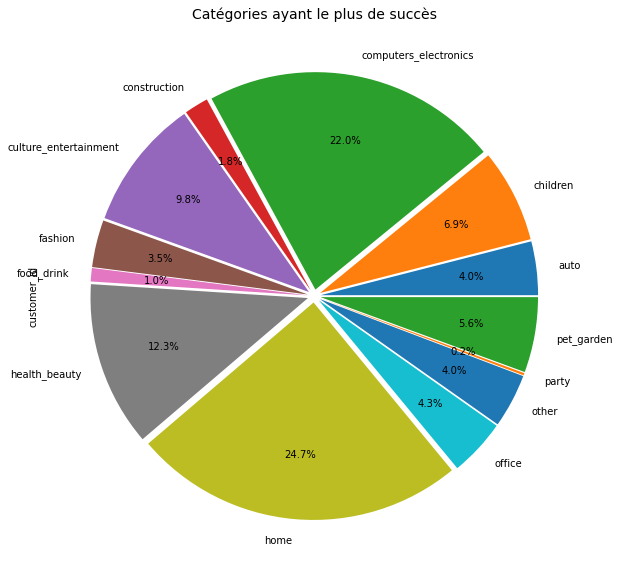

In [101]:
# Les catégories les plus achetées (en pourcentage)
%matplotlib inline
category = data.groupby(by='best_category')['customer_id'].nunique()
pie, ax = plt.subplots(figsize=[18,10])
category.plot.pie(autopct="%.1f%%",explode=[0.03]*13, pctdistance=0.7)
plt.title("Catégories ayant le plus de succès", fontsize=14)

plt.show()

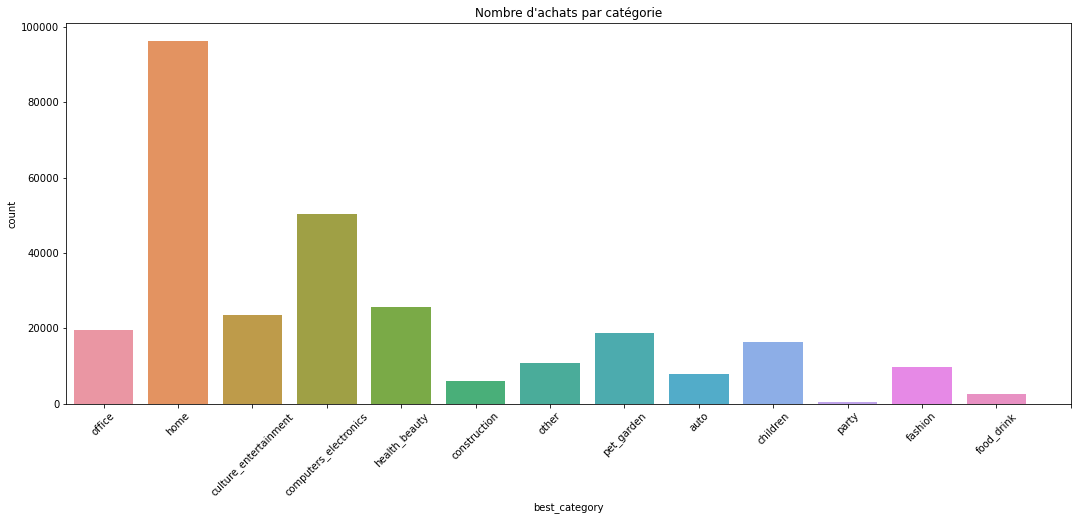

In [102]:
# Catégories les plus achetées (en nombre)
(fig, ax) = plt.subplots(figsize=(18, 7))
fig.patch.set_alpha(0.7)
plt.title("Nombre d'achats par catégorie")
sns.countplot(data=data,x="best_category")
plt.xticks(range(0,data["best_category"].nunique()+1), rotation=45)
plt.show()

#### 5.1.2. Pourcentage de clients à commande unique

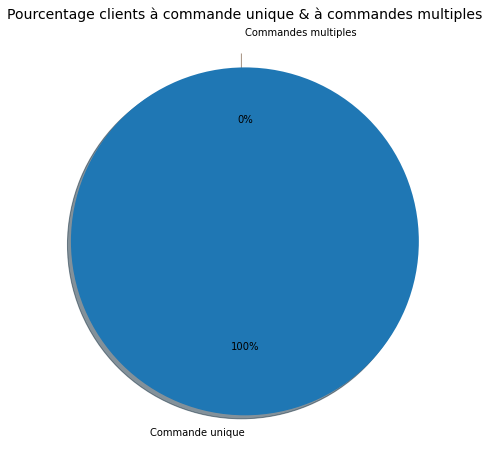

In [103]:
# Pourcentage de clients à commande unique et commandes multiples
commande_unique = data[data["nb_order"] == 1].count().values
commande_unique[0]

commandes_multiples = data[data["nb_order"] != 1].count().values
commandes_multiples[0]

labels = "Commande unique", "Commandes multiples"

sizes = [commande_unique[0], commandes_multiples[0]]
explode = (0, 0.1)

plt.figure(figsize = (8,8))

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)

plt.title("Pourcentage clients à commande unique & à commandes multiples", size=14)


plt.show()

In [104]:
data.columns

Index(['customer_id', 'zip_code_prefix', 'city', 'region', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_photos_qty',
       'seller_city', 'seller_region', 'product_category_name', 'nb_order',
       'nb_product', 'best_category', 'orders_tot_amount', 'freight_tot_value',
       'review_mean_score', 'prefered_payment_type', 'customer_seniority',
       'credit', 'delivery_delay'],
      dtype='object')

#### 5.1.3. Pourcentage de clients mono-produit vs multi-produits

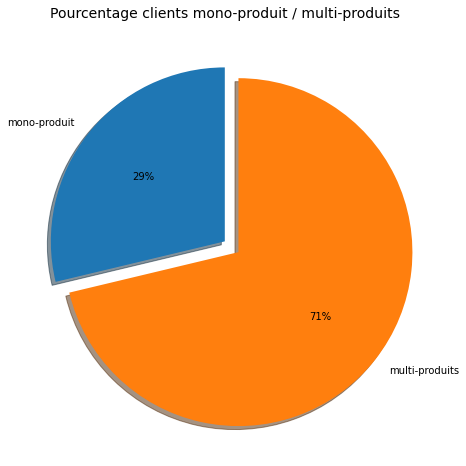

In [105]:
# Pourcentage de client à commande unique et commandes multiples
mono_produit = data[data["nb_product"] == 1].count().values
mono_produit[0]

multi_produits = data[data["nb_product"] != 1].count().values
multi_produits[0]

labels = "mono-produit", "multi-produits"

sizes = [mono_produit[0], multi_produits[0]]
explode = (0, 0.1)

plt.figure(figsize = (8,8))

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)

plt.title("Pourcentage clients mono-produit / multi-produits", size=14)


plt.show()

#### 5.1.4. Saisonnalité des achats

##### 5.1.4.1. Evolution annuelle des commandes

In [106]:
# création d'un dataframe avec les données dont nous avons besoin
df_orders = data["order_purchase_timestamp"]

# Converson des données au bon format
df_orders = pd.to_datetime(df_orders,errors='coerce')
df_orders = df_orders.dt.strftime("%d/%m/%Y")
df_orders=df_orders.astype("datetime64")

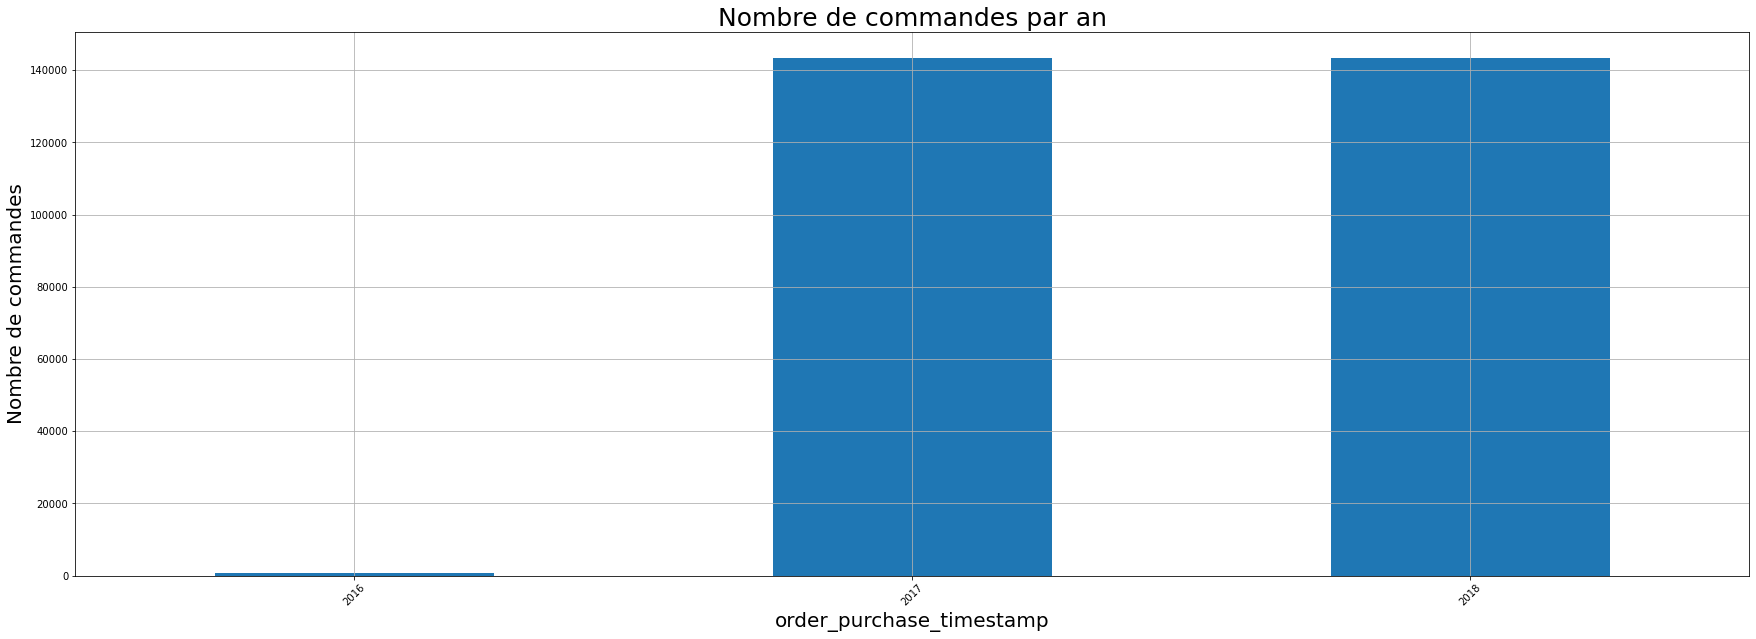

In [107]:
# Nombre de commandes par an
plt.figure(figsize=(30,10))
plt.title("Nombre de commandes par an", size=25)
plt.ylabel("Nombre de commandes", size=20)
plt.xlabel("Dates", size=20)
df_orders.groupby([df_orders.dt.year]).count().plot(kind="bar")
plt.xticks(rotation=45)
plt.grid()
plt.show()

##### 5.1.4.2. Evolution des commandes par mois

In [108]:
# Evolution des commandes par mois et années

# selection des données
df2=data.loc[:,['order_id']]
# création des colonnes et conversion au format date
df2['order_purchase_year'] = pd.to_datetime(data['order_purchase_timestamp']).dt.year
df2['order_purchase_month'] = pd.to_datetime(data['order_purchase_timestamp']).dt.month
# Regroupement nombre de commandes par mois et années
df2 = df2.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
# création d'une colonnne période
df2["period"] =  df2["order_purchase_year"].astype(str)  + "/" +df2["order_purchase_month"].astype(str)
df2.columns=["order_purchase_month","order_purchase_year","Number of order","period"]
df2=df2.sort_values(by=['order_purchase_year', 'order_purchase_month'])
df2.head()


,order_purchase_month,order_purchase_year,Number of order,period
17,10,2016,680,2016/10
20,12,2016,1,2016/12
0,1,2017,3508,2017/1
2,2,2017,4670,2017/2
4,3,2017,9342,2017/3


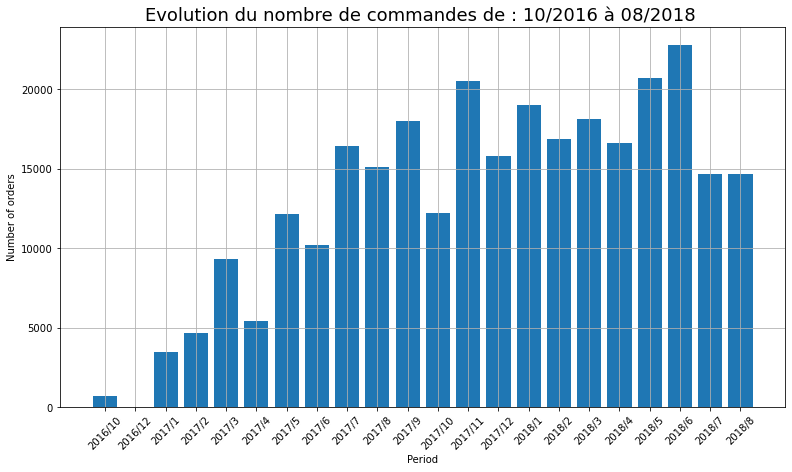

In [109]:
# Evolution du nombre de commandes du 10/2016 au 08/2018
(fig, ax) = plt.subplots(figsize=(13, 7))
fig.patch.set_alpha(0.7)
plt.title("Evolution du nombre de commandes de : 10/2016 à 08/2018 ", size=18)
ax=plt.bar(range(0,df2["period"].nunique()), df2["Number of order"].values)
plt.xticks(range(0,df2["period"].nunique()),df2["period"].unique(),rotation=45)
plt.xlabel("Period")
plt.ylabel("Number of orders")
plt.grid()

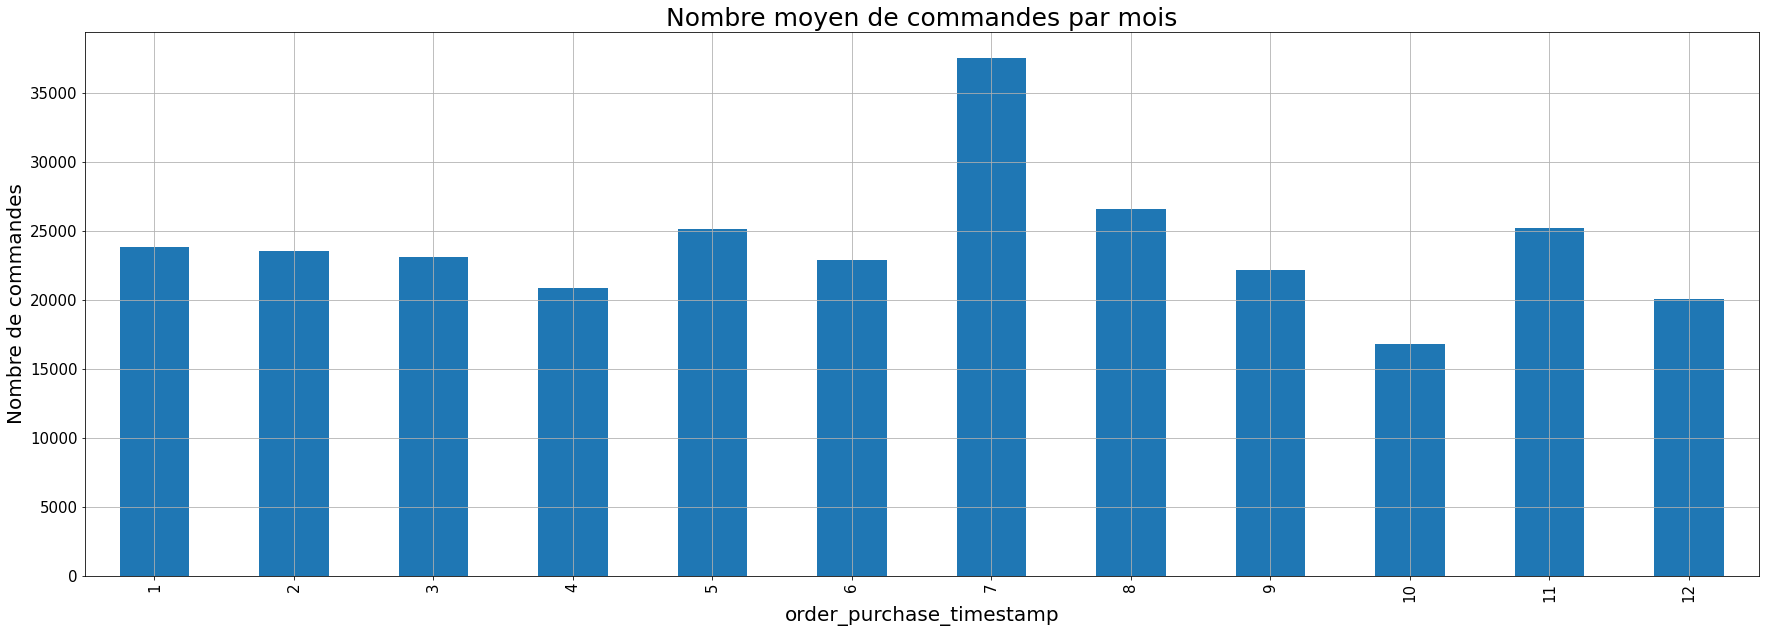

In [110]:
# Nombre moyen de commandes par mois
plt.figure(figsize=(30,10))

plt.title("Nombre moyen de commandes par mois", size=25)
plt.xlabel("Dates", size=20)
plt.xticks(rotation=0,size=15)
plt.yticks(size=15)
plt.ylabel("Nombre de commandes", size=20)

df_orders.groupby([df_orders.dt.month]).count().plot(kind="bar")
plt.grid()

plt.show()

##### 5.1.4.3. Nombre moyen de commandes par semaine

<ipython-input-111-29ff225ecf17>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_orders.groupby([df_orders.dt.week]).count().plot(kind="bar")


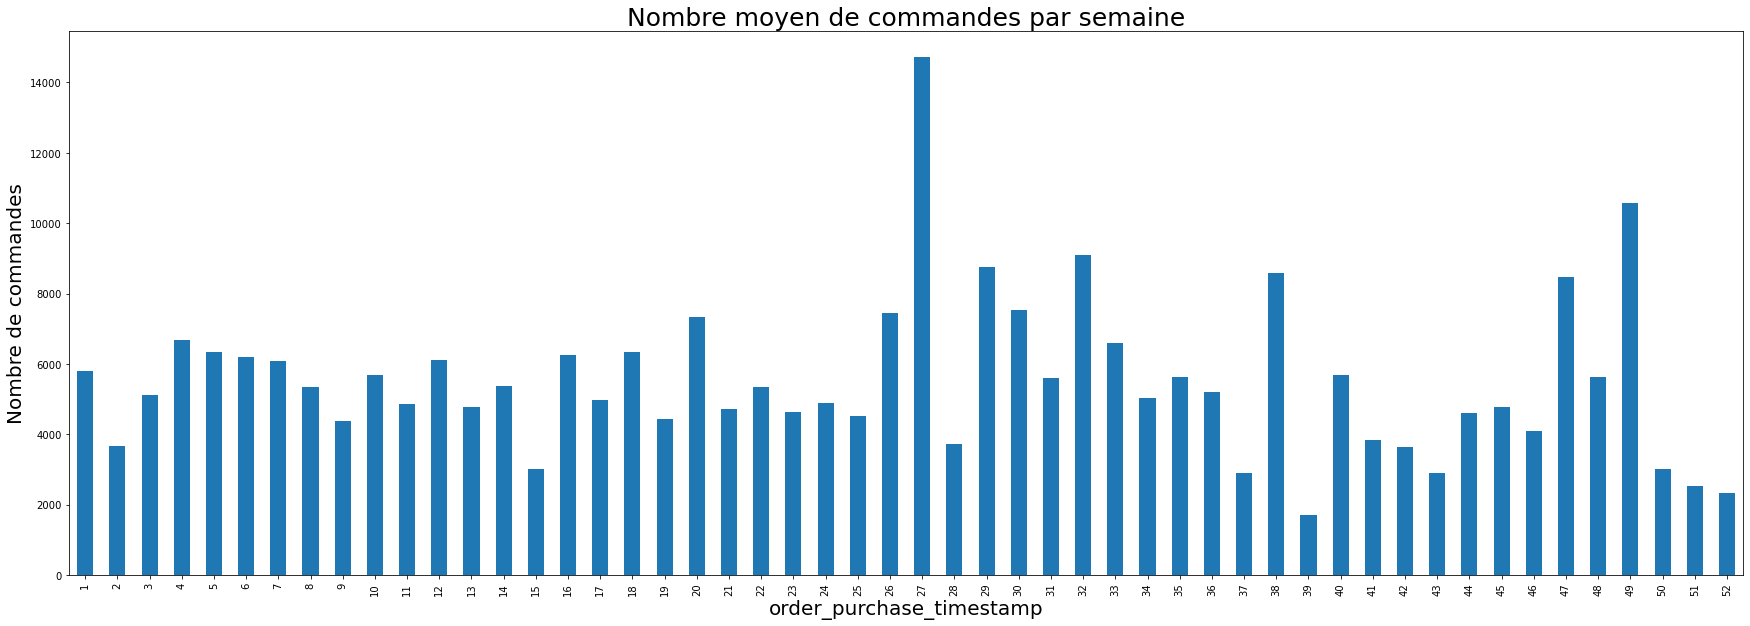

In [111]:
# Nombre moyen de commandes par semaine
plt.figure(figsize=(30,10))

plt.title("Nombre moyen de commandes par semaine", size=25)
plt.xlabel("Dates", size=20)
plt.ylabel("Nombre de commandes", size=20)

df_orders.groupby([df_orders.dt.week]).count().plot(kind="bar")

plt.show()

##### 5.1.4.4. Nombre moyen de commandes par jour

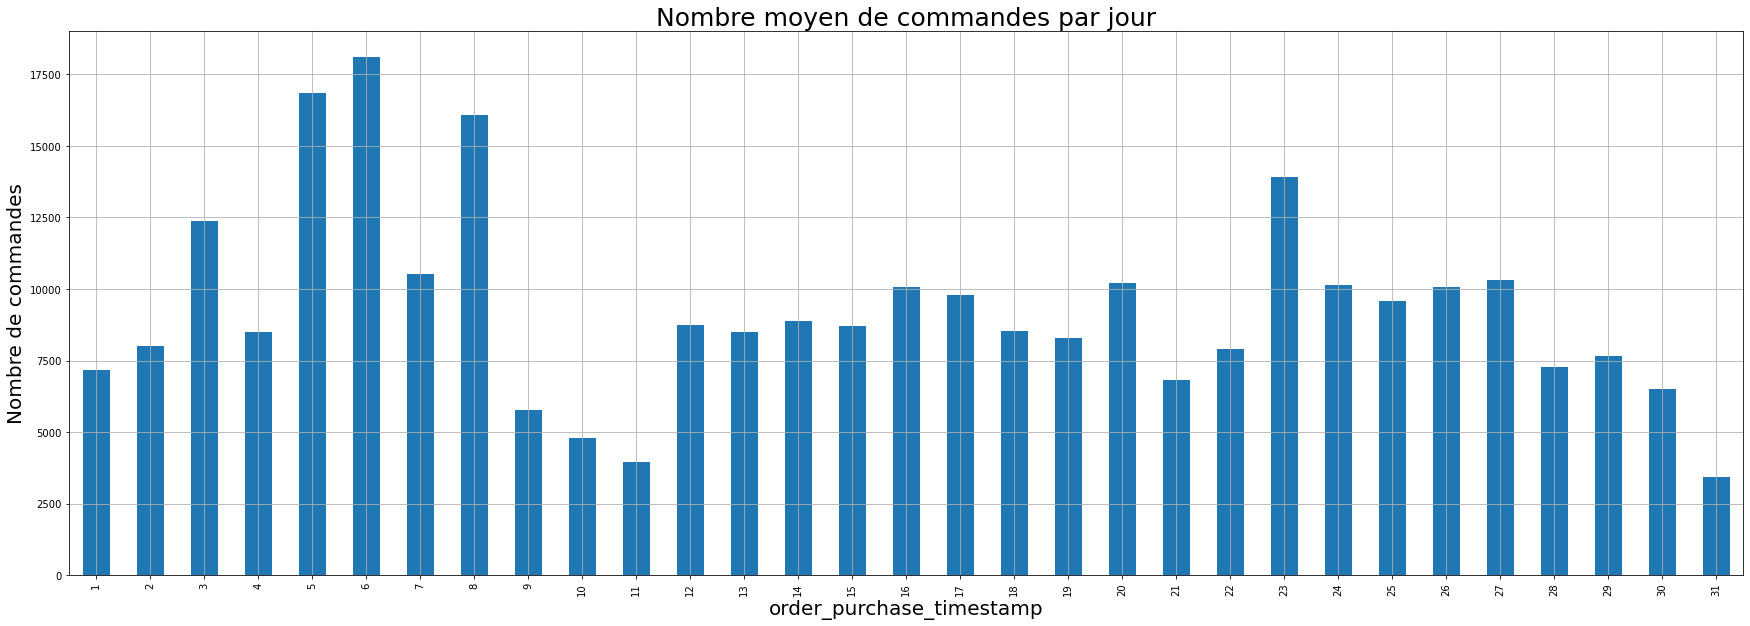

In [112]:
# Nombre moyen de commandes par jour
plt.figure(figsize=(30,10))

plt.title("Nombre moyen de commandes par jour", size=25)
plt.xlabel("Dates", size=20)
plt.ylabel("Nombre de commandes", size=20)
df_orders.groupby([df_orders.dt.day]).count().plot(kind="bar")
plt.grid()

plt.show()

#### 5.1.5. Top 10 des montants d'achat les plus fréquents

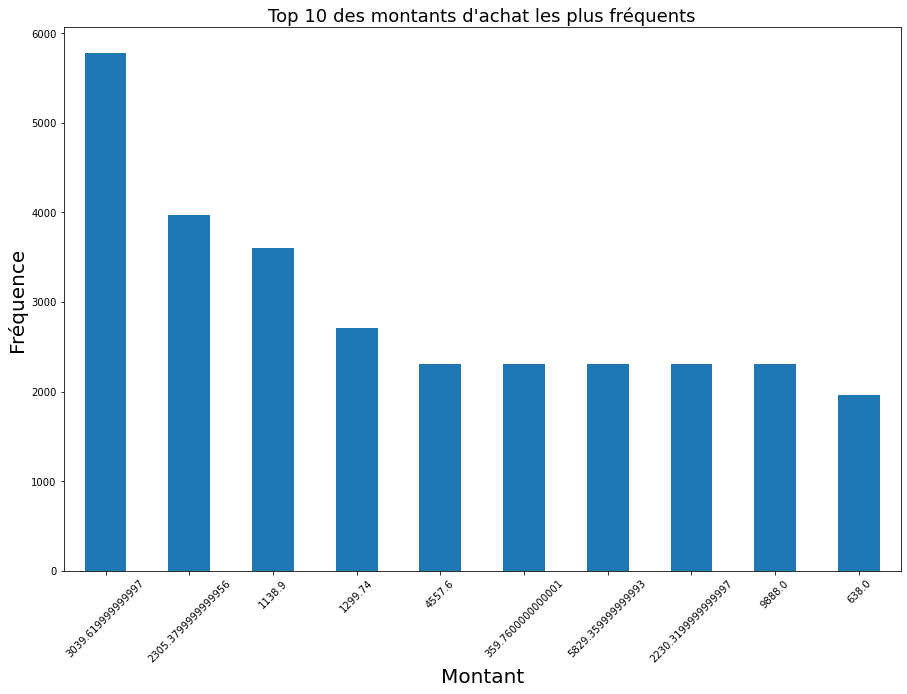

In [113]:
plt.figure(figsize=(15,10))
test = data.orders_tot_amount.value_counts()
test.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 des montants d\'achat les plus fréquents", size=18)
plt.ylabel("Fréquence", size=20)
plt.xlabel("Montant", size=20)
plt.xticks(rotation=45)
plt.show()

In [114]:
data.orders_tot_amount.max(), data.orders_tot_amount.min()

(13440.0, 0.85)

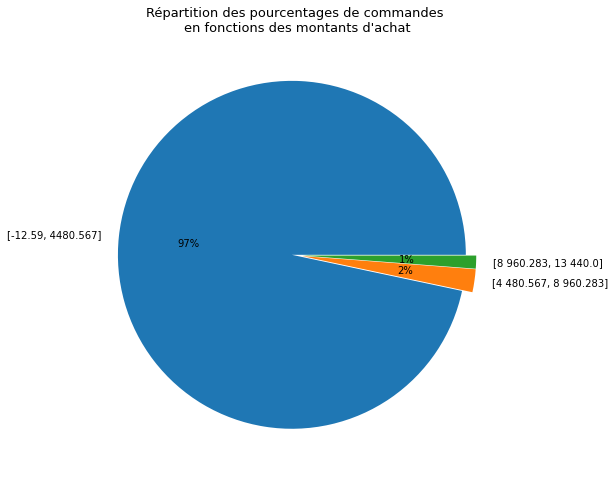

In [115]:
plt.figure(figsize = (8,8))
plt.title("Répartition des pourcentages de commandes \nen fonctions des montants d'achat",size=13)
df3 = data.orders_tot_amount.value_counts(bins=3)
explode = (0, 0.9)
labels = ["[-12.59, 4480.567]","[4 480.567, 8 960.283]","[8 960.283, 13 440.0]"]
plt.pie(df3,explode=[0.03]*3,labels=labels, autopct='%1.0f%%')
plt.show()

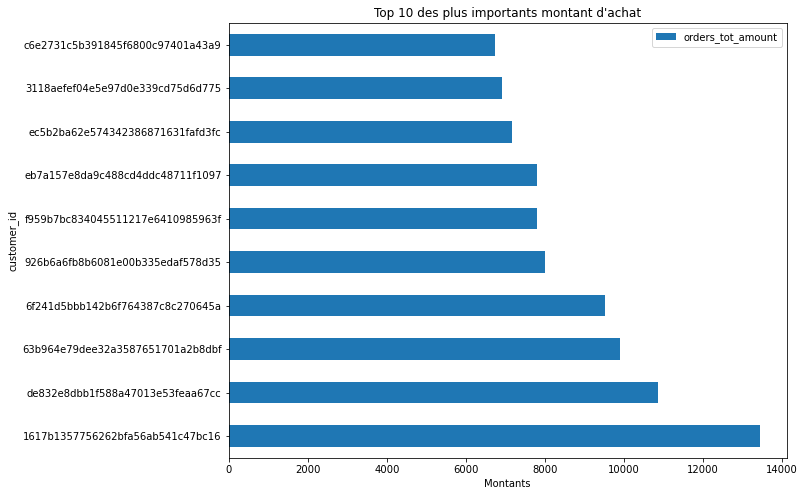

In [116]:
# Top 10 des plus importants montant d'achat

# Selection des données et intégration dans un dataframe
classement_montant= pd.DataFrame(data.groupby(by='customer_id')['orders_tot_amount'].agg('unique').sort_values(ascending=False).head(10))
# Modification du type des données
classement_montant['orders_tot_amount']=classement_montant['orders_tot_amount'].astype('float64')

#classement_montant.sort_values(by='orders_mean_amount',ascending=False)

# plot des données
figure3 = classement_montant
figure3.plot(kind='barh', figsize=(10,8), title="Top 10 des plus importants montant d'achat")
plt.xlabel("Montants")
plt.show()

### 5.2. Analyse modes de paiement

#### 5.2.1. Modes de paiements préférés

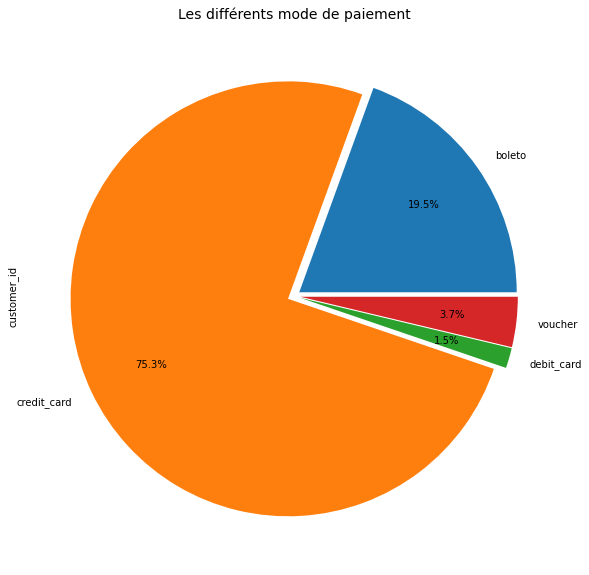

In [117]:
# Modes de paiements préférés
payment_type = data.groupby(by='prefered_payment_type')['customer_id'].nunique()
pie, ax = plt.subplots(figsize=[18,10])
payment_type.plot.pie(autopct="%.1f%%",explode=[0.03]*4, pctdistance=0.7)
plt.title("Les différents mode de paiement", fontsize=14)
plt.show()

#### 5.2.2. Clients ayant recours au paiement en plusieurs fois

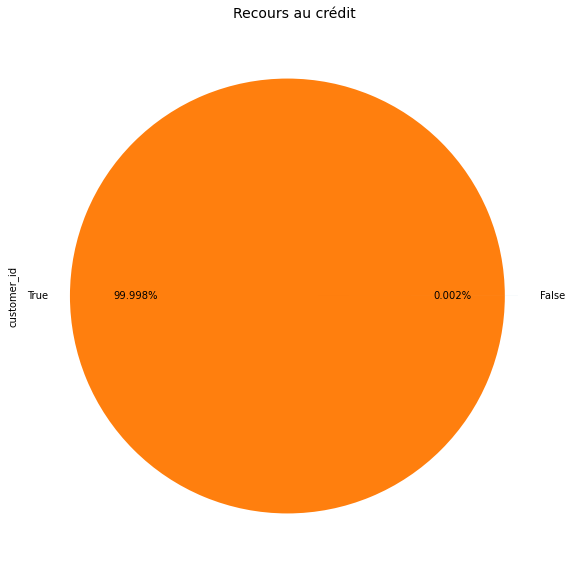

In [118]:
# Pourcentage de clients ayant recours au crédit (paiement en plusieurs fois)
credit = data.groupby(by='credit')['customer_id'].nunique()
pie, ax = plt.subplots(figsize=[18,10])
credit.plot.pie(autopct="%.3f%%",explode=[0.03]*2, pctdistance=0.7)
plt.title("Recours au crédit", fontsize=14)
plt.show()

### 5.3. Avis clients

In [119]:
data.groupby(by='review_mean_score')['customer_id'].nunique().index

Float64Index([               1.0,                1.5,                2.0,
                             2.5,                3.0, 3.3333333333333335,
                             3.5,                4.0,  4.333333333333333,
                             4.5,                5.0],
             dtype='float64', name='review_mean_score')

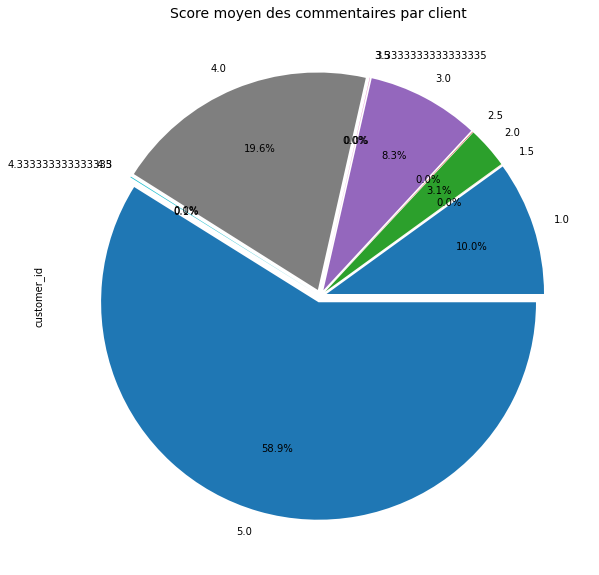

In [120]:
# Score moyen des commentaires par client
review_score = data.groupby(by='review_mean_score')['customer_id'].nunique()
pie, ax = plt.subplots(figsize=[18,10])
review_score.plot.pie(autopct="%.1f%%",explode=[0.03]*11, pctdistance=0.7)
plt.title("Score moyen des commentaires par client ", fontsize=14)
plt.show()

### 5.4. Analyse géographique

#### 5.4.1. Régions comptant le plus de clients

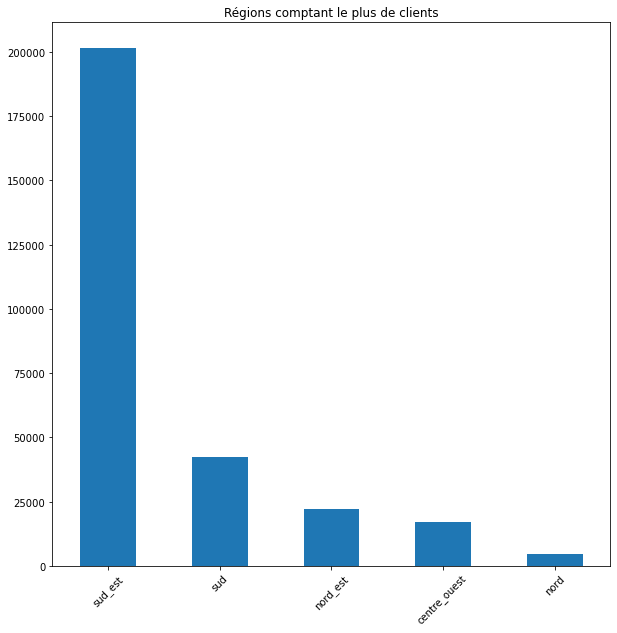

In [121]:
# Classement des régions
plt.figure(figsize=(10,10))
plt.title('Régions comptant le plus de clients')
data.region.value_counts()[:10].plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

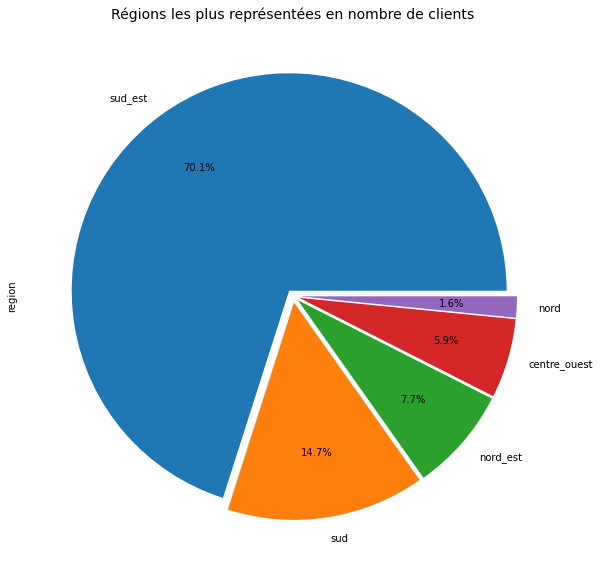

In [122]:
# Les régions les plus représentées en nombre de clients
region_top10 = data.region.value_counts()
pie, ax = plt.subplots(figsize=[18,10])
region_top10.plot.pie(autopct="%.1f%%",explode=[0.03]*5, pctdistance=0.7)
plt.title("Régions les plus représentées en nombre de clients", fontsize=14)
plt.show()

#### 5.4.2. Villes comptant le plus de clients

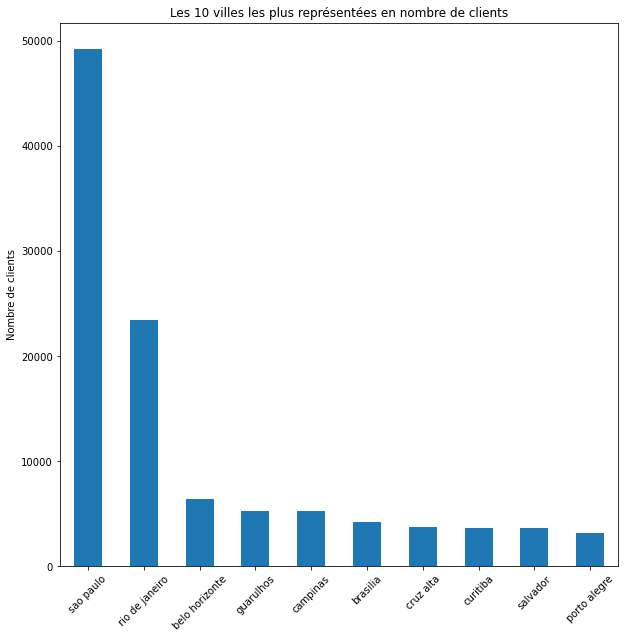

In [123]:
# Les 10 villes les plus représentés
plt.figure(figsize=(10,10))
plt.title('Les 10 villes les plus représentées en nombre de clients')
data.city.value_counts()[:10].plot(kind='bar')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.show()

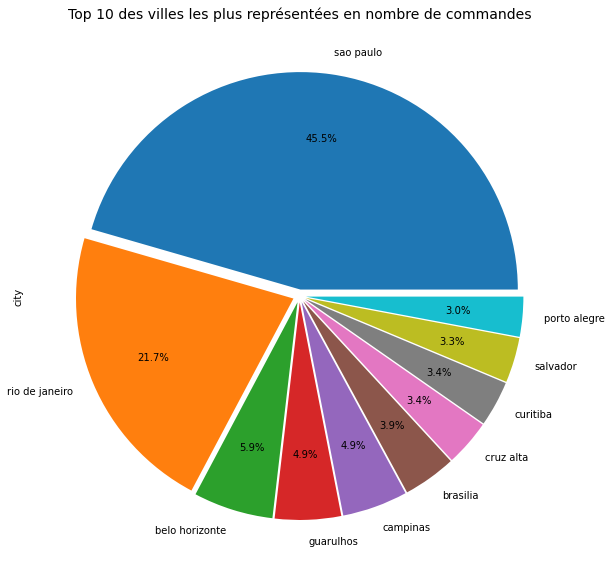

In [124]:
ville_top10 = data.city.value_counts()[:10]
pie, ax = plt.subplots(figsize=[18,10])
ville_top10.plot.pie(autopct="%.1f%%",explode=[0.03]*10, pctdistance=0.7)
plt.title("Top 10 des villes les plus représentées en nombre de commandes", fontsize=14)
plt.show()

#### 5.4.3. Régions comptant le plus de vendeurs

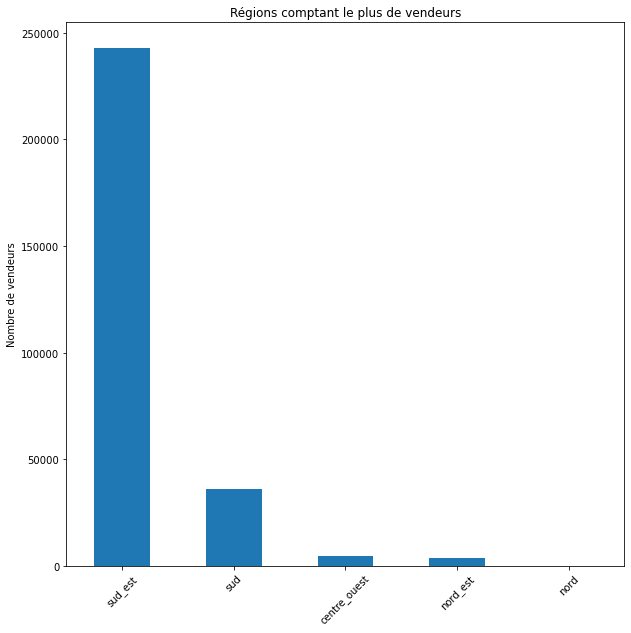

In [125]:
# Classement des régions pour les vendeurs
plt.figure(figsize=(10,10))
plt.title('Régions comptant le plus de vendeurs')
data.seller_region.value_counts().plot(kind='bar')
plt.ylabel('Nombre de vendeurs')
plt.xticks(rotation=45)
plt.show()

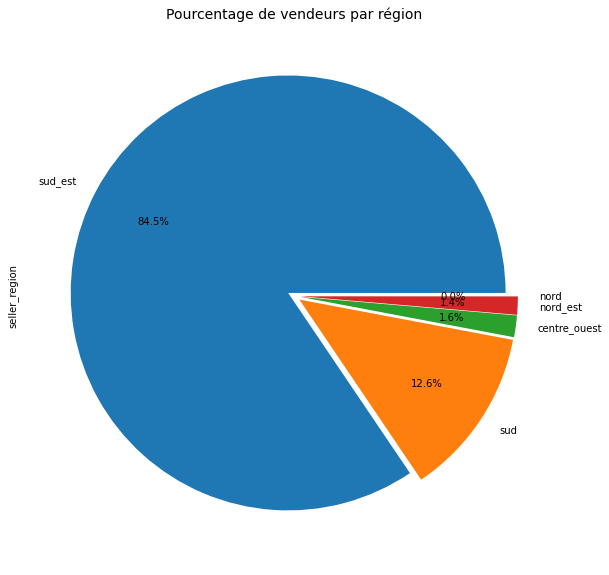

In [126]:
# Les régions les plus représentées en nombre de vendeurs
seller_region = data.seller_region.value_counts()
pie, ax = plt.subplots(figsize=[18,10])
seller_region.plot.pie(autopct="%.1f%%",explode=[0.03]*5, pctdistance=0.7)
plt.title("Pourcentage de vendeurs par région", fontsize=14)
plt.show()

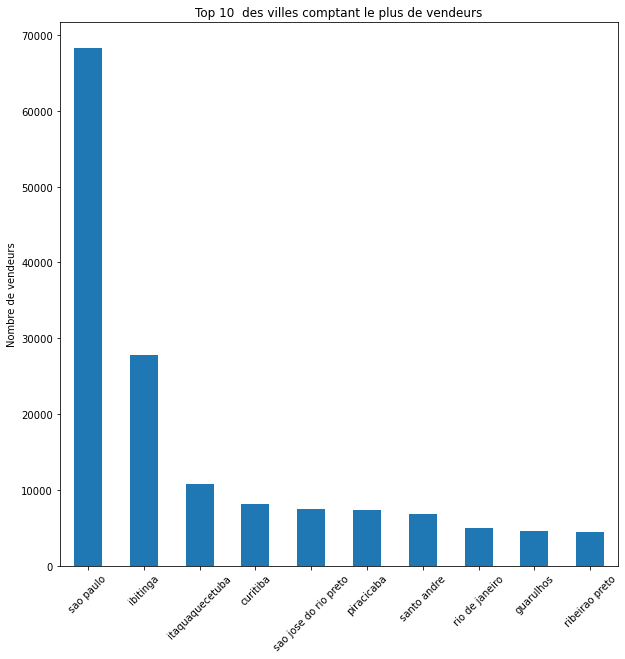

In [127]:
# Classement des villes en nombre de vendeurs
top10_seller_city =data.seller_city.value_counts()[:10]
plt.figure(figsize=(10,10))
plt.title('Top 10  des villes comptant le plus de vendeurs')
plt.ylabel('Nombre de vendeurs')
top10_seller_city.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

## 6. Analyse de la distribution des variables

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


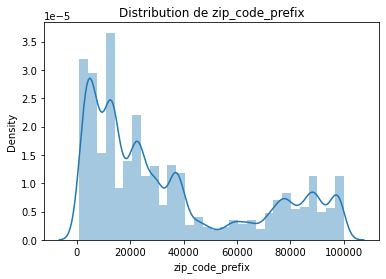

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


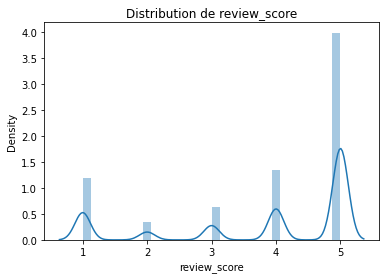

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


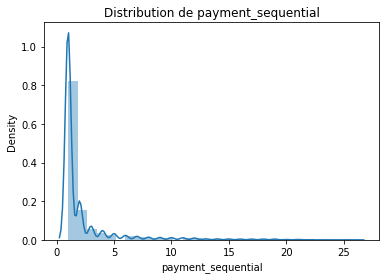

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


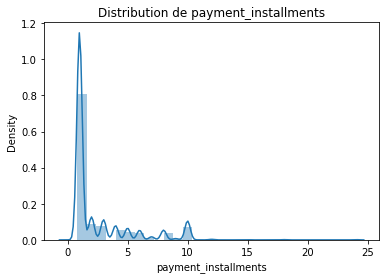

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


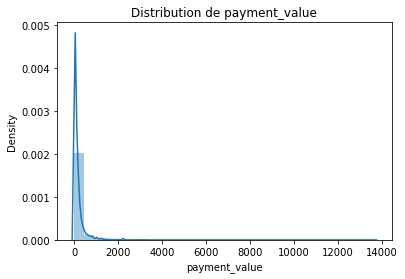

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


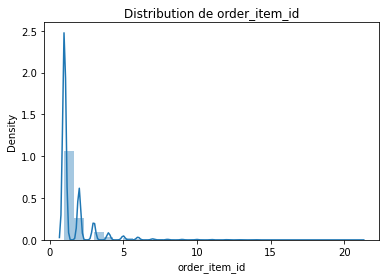

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


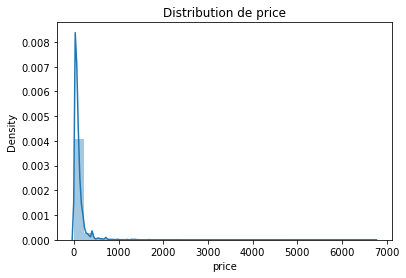

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


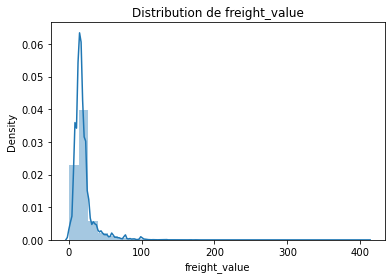

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


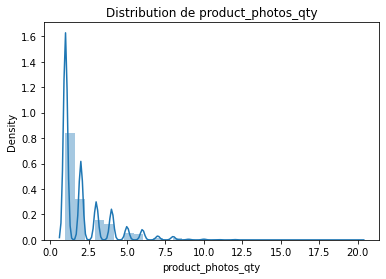

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


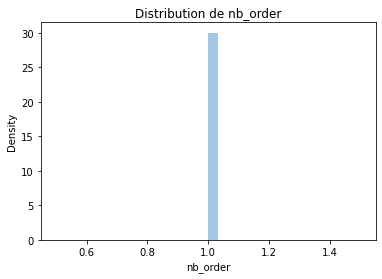

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


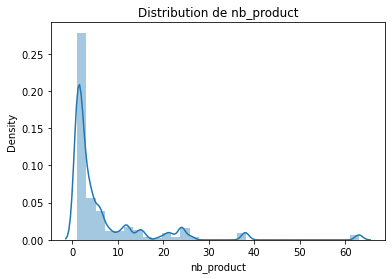

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


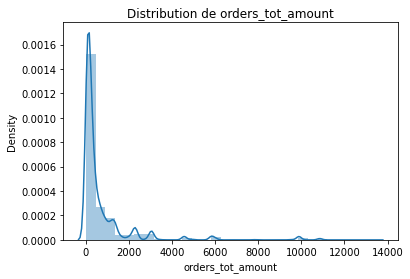

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


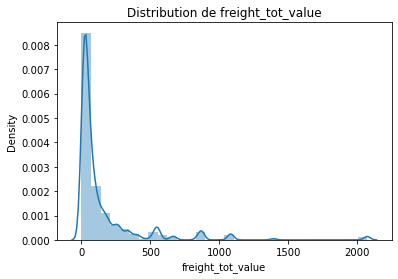

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


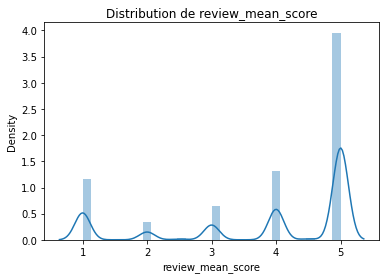

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


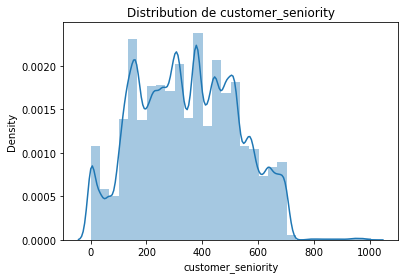

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


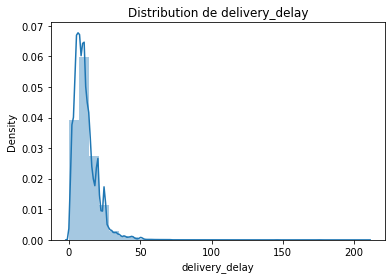

In [128]:
%matplotlib inline
for column in data.select_dtypes(['int64', 'float64']).columns:
    titre = 'Distribution de ' + str(column)
    plt.title(titre)
    sns.distplot(data[column], bins=30)
    titre = 'Distribution de ' + str(column)
    plt.show()

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


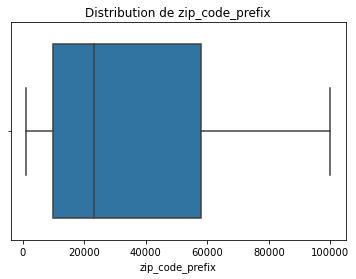

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


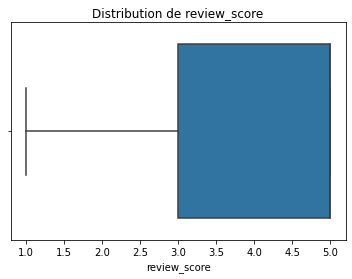

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


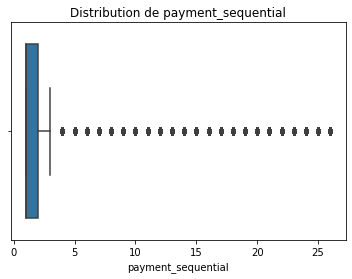

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


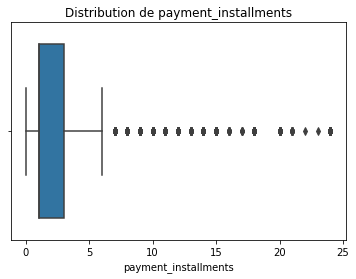

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


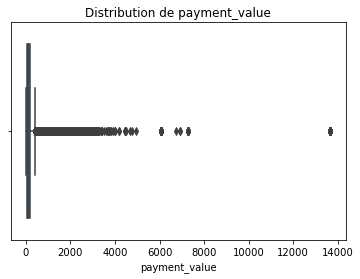

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


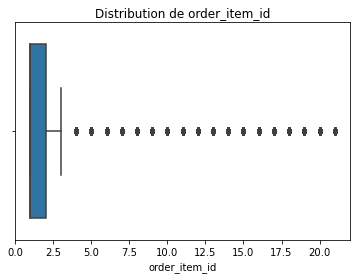

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


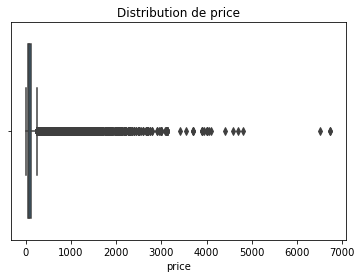

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


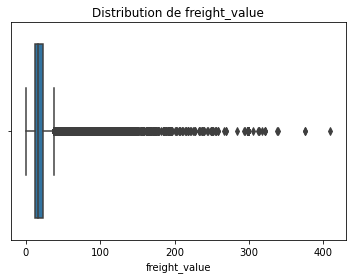

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


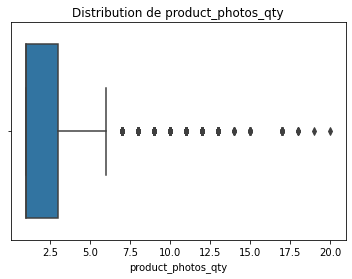

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


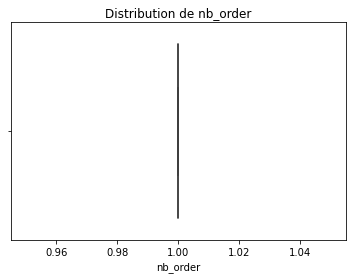

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


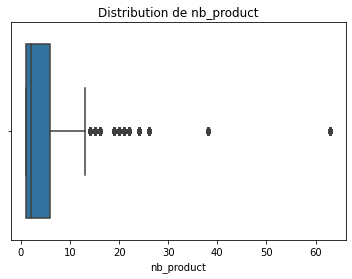

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


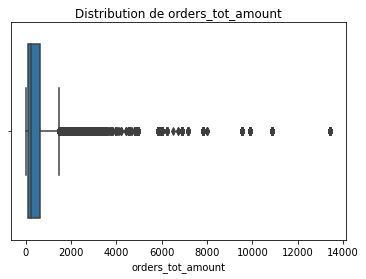

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


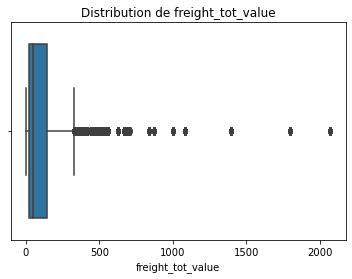

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


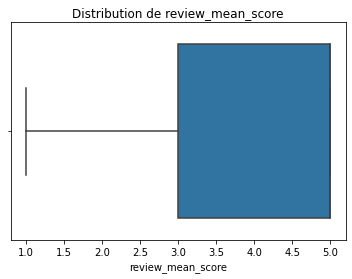

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


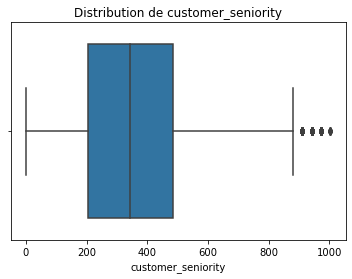

C:\Users\DELL LATITUDE E7240\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


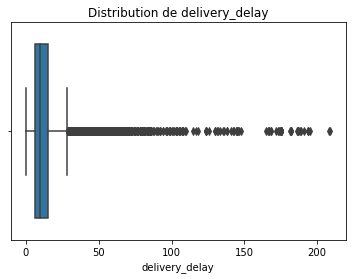

In [129]:
%matplotlib inline
for column in data.select_dtypes(['int64', 'float64']).columns:
    titre = 'Distribution de ' + str(column)
    plt.title(titre)
    sns.boxplot(data[column])
    titre = 'Distribution de ' + str(column)
    plt.show()

## 7. Corrélation entre les variables

### 7.1. Matrice de corrélation

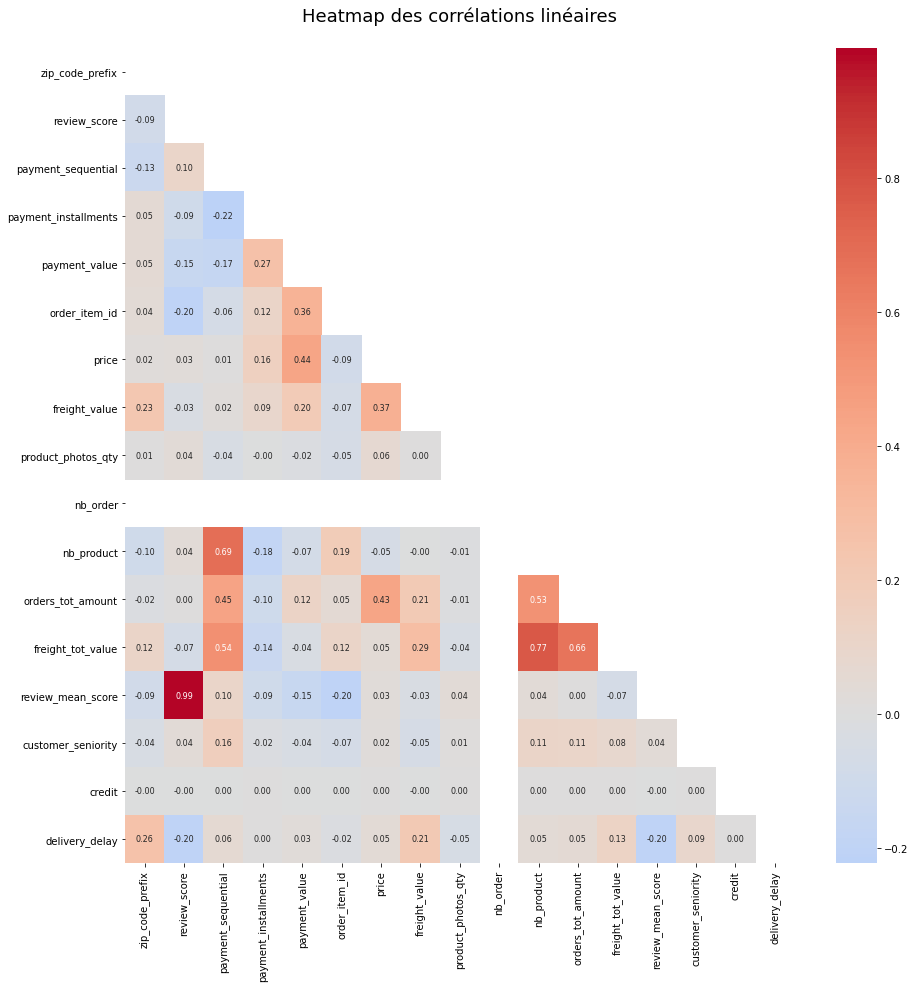

In [130]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n", size=18)
plt.show()

### 7.2. Affichage des variables avec une corrélation supérieure à 70 %

In [131]:
# Visualisation sous forme de tableau des corrélations supérieures à 70 % 
threshold = 0.70
corr_pairs = corr.unstack().sort_values(kind="quicksort")
strong_corr = (pd.DataFrame(corr_pairs[(abs(corr_pairs) > threshold)])
               .reset_index().rename(columns={0:'corr_coeff'}))
strong_corr = strong_corr[(strong_corr.index%2 == 0) & (strong_corr['level_0'] != strong_corr['level_1'])]
strong_corr.sort_values('corr_coeff', ascending=False)

,level_0,level_1,corr_coeff
2,review_score,review_mean_score,0.994749
0,nb_product,freight_tot_value,0.770476


### 7.3. Suppression des variables fortement corrélés

In [132]:
# Suppression des variables fortement corrélées ainsi que la variable 'zip_code_prefix' (Nous conservons à la place les varaibles city 
# et region pour la localisation des clients)
data_cleaned = data.drop(['review_score'],axis=1)

### 7.3. Suppression des variables variables inutiles

In [133]:
data.columns

Index(['customer_id', 'zip_code_prefix', 'city', 'region', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_photos_qty',
       'seller_city', 'seller_region', 'product_category_name', 'nb_order',
       'nb_product', 'best_category', 'orders_tot_amount', 'freight_tot_value',
       'review_mean_score', 'prefered_payment_type', 'customer_seniority',
       'credit', 'delivery_delay'],
      dtype='object')

In [134]:
# Suppression des colonnes inutiles
columns_to_drop2=['zip_code_prefix', 'city', 'order_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'payment_type',
       'payment_value', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_photos_qty',
       'seller_city', 'seller_region', 'product_category_name', 'credit','Nom']

data_cleaned.drop(columns=columns_to_drop2,axis=1,inplace=True)

KeyError: "['Nom'] not found in axis"

In [ ]:
data_cleaned.head()

In [ ]:
data_structure(data_cleaned)

In [ ]:
data_cleaned.drop_duplicates(inplace=True)

In [ ]:
# Structure finale des données
data_structure(data_cleaned)

## 8. Export du jeu de données

In [ ]:
data_cleaned.to_csv('data_cleaned.csv')